<a href="https://colab.research.google.com/github/Vijay06111998/Customer_Behavior_Modeling/blob/main/Customer_Lifetime_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

## Sachin

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data Overview
df=pd.read_csv('https://raw.githubusercontent.com/Kanchan786786/Marketing_Analytics/main/customer_lifetime_value_dataset(1).csv')
df.columns

Index(['customerid', 'firstpurchasedate', 'lastpurchasedate', 'totalpurchases',
       'totalrevenue', 'referralsource', 'churnindicator', 'discountsused',
       'productcategory', 'responsetolastcampaign', 'feedbackscore',
       'preferredpaymentmethod', 'supportticketsraised', 'hasloyaltycard',
       'frequency'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerid              10000 non-null  int64  
 1   firstpurchasedate       10000 non-null  object 
 2   lastpurchasedate        10000 non-null  object 
 3   totalpurchases          10000 non-null  int64  
 4   totalrevenue            10000 non-null  int64  
 5   referralsource          10000 non-null  object 
 6   churnindicator          10000 non-null  int64  
 7   discountsused           10000 non-null  int64  
 8   productcategory         10000 non-null  object 
 9   responsetolastcampaign  10000 non-null  object 
 10  feedbackscore           10000 non-null  float64
 11  preferredpaymentmethod  10000 non-null  object 
 12  supportticketsraised    10000 non-null  object 
 13  hasloyaltycard          10000 non-null  object 
 14  frequency               10000 non-null 

In [ ]:
# Convert churnindicator to object (string) dtype
df['churnindicator'] = df['churnindicator'].map({0: 'Not Churned', 1: 'Churned'}).astype('object')

# Verify the conversion
print(df['churnindicator'].dtype)


object


# Basic Feature Engineering:
1. Create 'avgpurchasevalue' Average value of purchases made by the customer (totalrevenue/totalpurchases).
2. Create 'recency' Number of days since the last purchase.
3. Create 'tenure' Number of days since the customer's first purchase (useful for understanding how long they've been a customer).
4. Create 'avgtimebetweenpurchases': Average number of days between purchases.

In [ ]:
# 1. Create 'avgpurchasevalue' Average value of purchases made by the customer (totalrevenue/totalpurchases).
df['avgpurchasevalue'] = round((df['totalrevenue'] / df['totalpurchases']),2)
df['avgpurchasevalue'].head(10)


,avgpurchasevalue
0,1667.14
1,263.00
2,337.59
3,639.40
4,779.54
5,1333.12
6,167.79
7,353.04
8,1425.43
9,234.04


In [ ]:
# 2. Create 'recency' Number of days since the last purchase.

#considering a constant date of '2023-09-01' to create the column.
df['recency'] = (pd.to_datetime('2023-09-01') - pd.to_datetime(df['lastpurchasedate'])).dt.days
df['recency'].head(10)


,recency
0,544
1,211
2,574
3,376
4,540
5,575
6,626
7,32
8,1541
9,63


In [ ]:
# 3. Create 'tenure' Number of days since the customer's first purchase (useful for understanding how long they've been a customer).
df['tenure'] = (pd.to_datetime('2023-09-01') - pd.to_datetime(df['firstpurchasedate'])).dt.days
df['tenure'].head(10)



,tenure
0,609
1,1435
2,810
3,765
4,955
5,823
6,710
7,1526
8,1549
9,1204


In [ ]:
# 4. Create 'avgtimebetweenpurchases': Average number of days between purchases.
df['firstpurchasedate'] = pd.to_datetime(df['firstpurchasedate'])
df['lastpurchasedate'] = pd.to_datetime(df['lastpurchasedate'])
df['timebetwendays']=(df['lastpurchasedate']-df['firstpurchasedate']).dt.days
df['avgtimebetwendays']=df['timebetwendays']/(df['totalpurchases']-1)
df['avgtimebetwendays'] = df['avgtimebetwendays'].fillna(0)
df['avgtimebetwendays'] = round(df['avgtimebetwendays'],2)
df['avgtimebetwendays'].head(10)

,avgtimebetwendays
0,10.83
1,64.42
2,8.43
3,27.79
4,34.58
5,35.43
6,3.00
7,62.25
8,1.33
9,45.64


# <center> EDA

### Preliminary EDA:
    1. Load the provided dataset into a Pandas DataFrame. Display the first 5 rows of the DataFrame to understand its structure.
    2. Generate a report detailing the data types of each column in the dataset. How many of them are categorical? How many are numerical?
    3. Compute and display basic statistical summaries (mean, median, standard deviation, etc.) for all the numerical columns in the dataset.
    4. Identify any missing values in the dataset. How many missing values are there in each column?

In [ ]:
#1. Load the provided dataset into a Pandas DataFrame. Display the first 5 rows of the DataFrame to understand its structure.

df.head(5)

,customerid,firstpurchasedate,lastpurchasedate,totalpurchases,totalrevenue,referralsource,churnindicator,discountsused,productcategory,responsetolastcampaign,feedbackscore,preferredpaymentmethod,supportticketsraised,hasloyaltycard,frequency,avgpurchasevalue,recency,tenure,timebetwendays,avgtimebetwendays
0,8519,2021-12-31,2022-03-06,7,11670,Online advertisements,Not Churned,2,Q02,ignored,4.729998,debit card,0,no,7,1667.14,544,609,65,10.83
1,38152,2019-09-27,2023-02-02,20,5260,Traditional media outreach,Churned,6,F76,purchased,4.184512,cash,0,no,2,263.00,211,1435,1224,64.42
2,19680,2021-06-13,2022-02-04,29,9790,Influencer endorsements,Not Churned,2,X04,opened mail,4.346640,google pay,0,no,4,337.59,574,810,236,8.43
3,35744,2021-07-28,2022-08-21,15,9591,Influencer endorsements,Not Churned,5,A25,ignored,5.000000,debit card,0,no,13,639.40,376,765,389,27.79
4,11663,2021-01-19,2022-03-10,13,10134,Word of mouth,Not Churned,3,A16,ignored,4.482089,credit card,0,no,11,779.54,540,955,415,34.58


In [ ]:
#2. Generate a report detailing the data types of each column in the dataset. How many of them are categorical? How many are numerical?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customerid              10000 non-null  int64         
 1   firstpurchasedate       10000 non-null  datetime64[ns]
 2   lastpurchasedate        10000 non-null  datetime64[ns]
 3   totalpurchases          10000 non-null  int64         
 4   totalrevenue            10000 non-null  int64         
 5   referralsource          10000 non-null  object        
 6   churnindicator          10000 non-null  object        
 7   discountsused           10000 non-null  int64         
 8   productcategory         10000 non-null  object        
 9   responsetolastcampaign  10000 non-null  object        
 10  feedbackscore           10000 non-null  float64       
 11  preferredpaymentmethod  10000 non-null  object        
 12  supportticketsraised    10000 non-null  object 

## Categorical Columns : referralsource, productcategory, responsetolastcampaign, preferredpaymentmethod, supportticketsraied, hasloyaltycard.

## Numerical Columns : customerid,totalpurchases,totalrevenue,churnindicator,discountsused,feedbackscore,frequency,recency,tenure,timebetweenpurchases,avgtimebetweenpurchases,timebetwendays,avgtimebetwendays.

Count of Categorical columns : 7

Count of Numerical Columns : 13

In [ ]:
#3. Compute and display basic statistical summaries (mean, median, standard deviation, etc.) for all the numerical columns in the dataset.
df.describe()

,customerid,firstpurchasedate,lastpurchasedate,totalpurchases,totalrevenue,discountsused,feedbackscore,frequency,avgpurchasevalue,recency,tenure,timebetwendays,avgtimebetwendays
count,10000.000000,10000,10000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000
mean,27519.237400,2020-08-20 10:49:00.480000,2022-02-24 23:18:23.040000,19.28050,8521.876100,2.993600,4.433905,10.053700,629.636337,553.028900,1106.549300,553.520400,inf
min,5000.000000,2019-02-04 00:00:00,2019-02-24 00:00:00,1.00000,4401.000000,0.000000,1.006071,1.000000,123.150000,2.000000,7.000000,0.000000,0.0000
25%,16144.750000,2019-09-17 00:00:00,2021-05-27 00:00:00,13.00000,6427.750000,1.000000,4.251318,4.000000,314.570000,222.000000,821.000000,224.000000,14.5675
50%,27617.000000,2020-06-21 00:00:00,2022-05-05 12:00:00,20.00000,8543.000000,3.000000,4.985672,9.000000,435.365000,483.500000,1167.000000,485.000000,28.6250
75%,38967.250000,2021-06-02 00:00:00,2023-01-22 00:00:00,26.00000,10589.250000,5.000000,5.000000,14.000000,649.432500,827.000000,1445.000000,828.000000,45.2225
max,49994.000000,2023-08-25 00:00:00,2023-08-30 00:00:00,40.00000,12678.000000,6.000000,5.000000,31.000000,12658.000000,1650.000000,1670.000000,1663.000000,inf
std,13118.347463,NaN,NaN,7.82962,2388.452322,2.005283,0.920760,7.098652,816.565613,392.283779,392.949289,392.019992,NaN


In [ ]:
#4. Identify any missing values in the dataset. How many missing values are there in each column?
df.isnull().sum()

,0
customerid,0
firstpurchasedate,0
lastpurchasedate,0
totalpurchases,0
totalrevenue,0
referralsource,0
churnindicator,0
discountsused,0
productcategory,0
responsetolastcampaign,0


### Univariate Analysis:
    1. Plot histograms for all numerical columns in the dataset. What distributions can you identify based on the histograms?
    2. For each categorical column, generate bar plots depicting the frequency of each category. Which category dominates in each column?


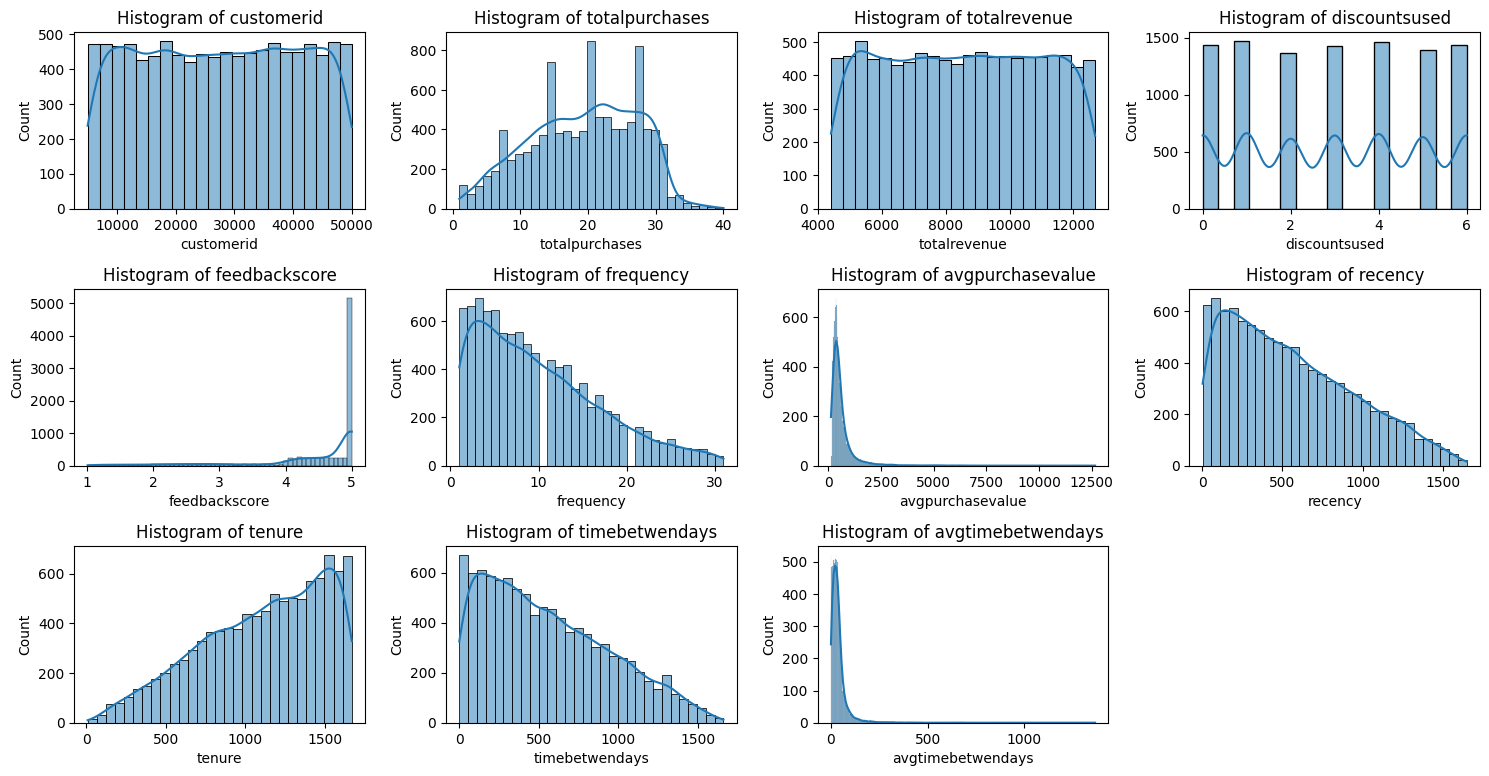

In [ ]:
# Separating numerical and categorical columns based on data types
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Step 1: Plot histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

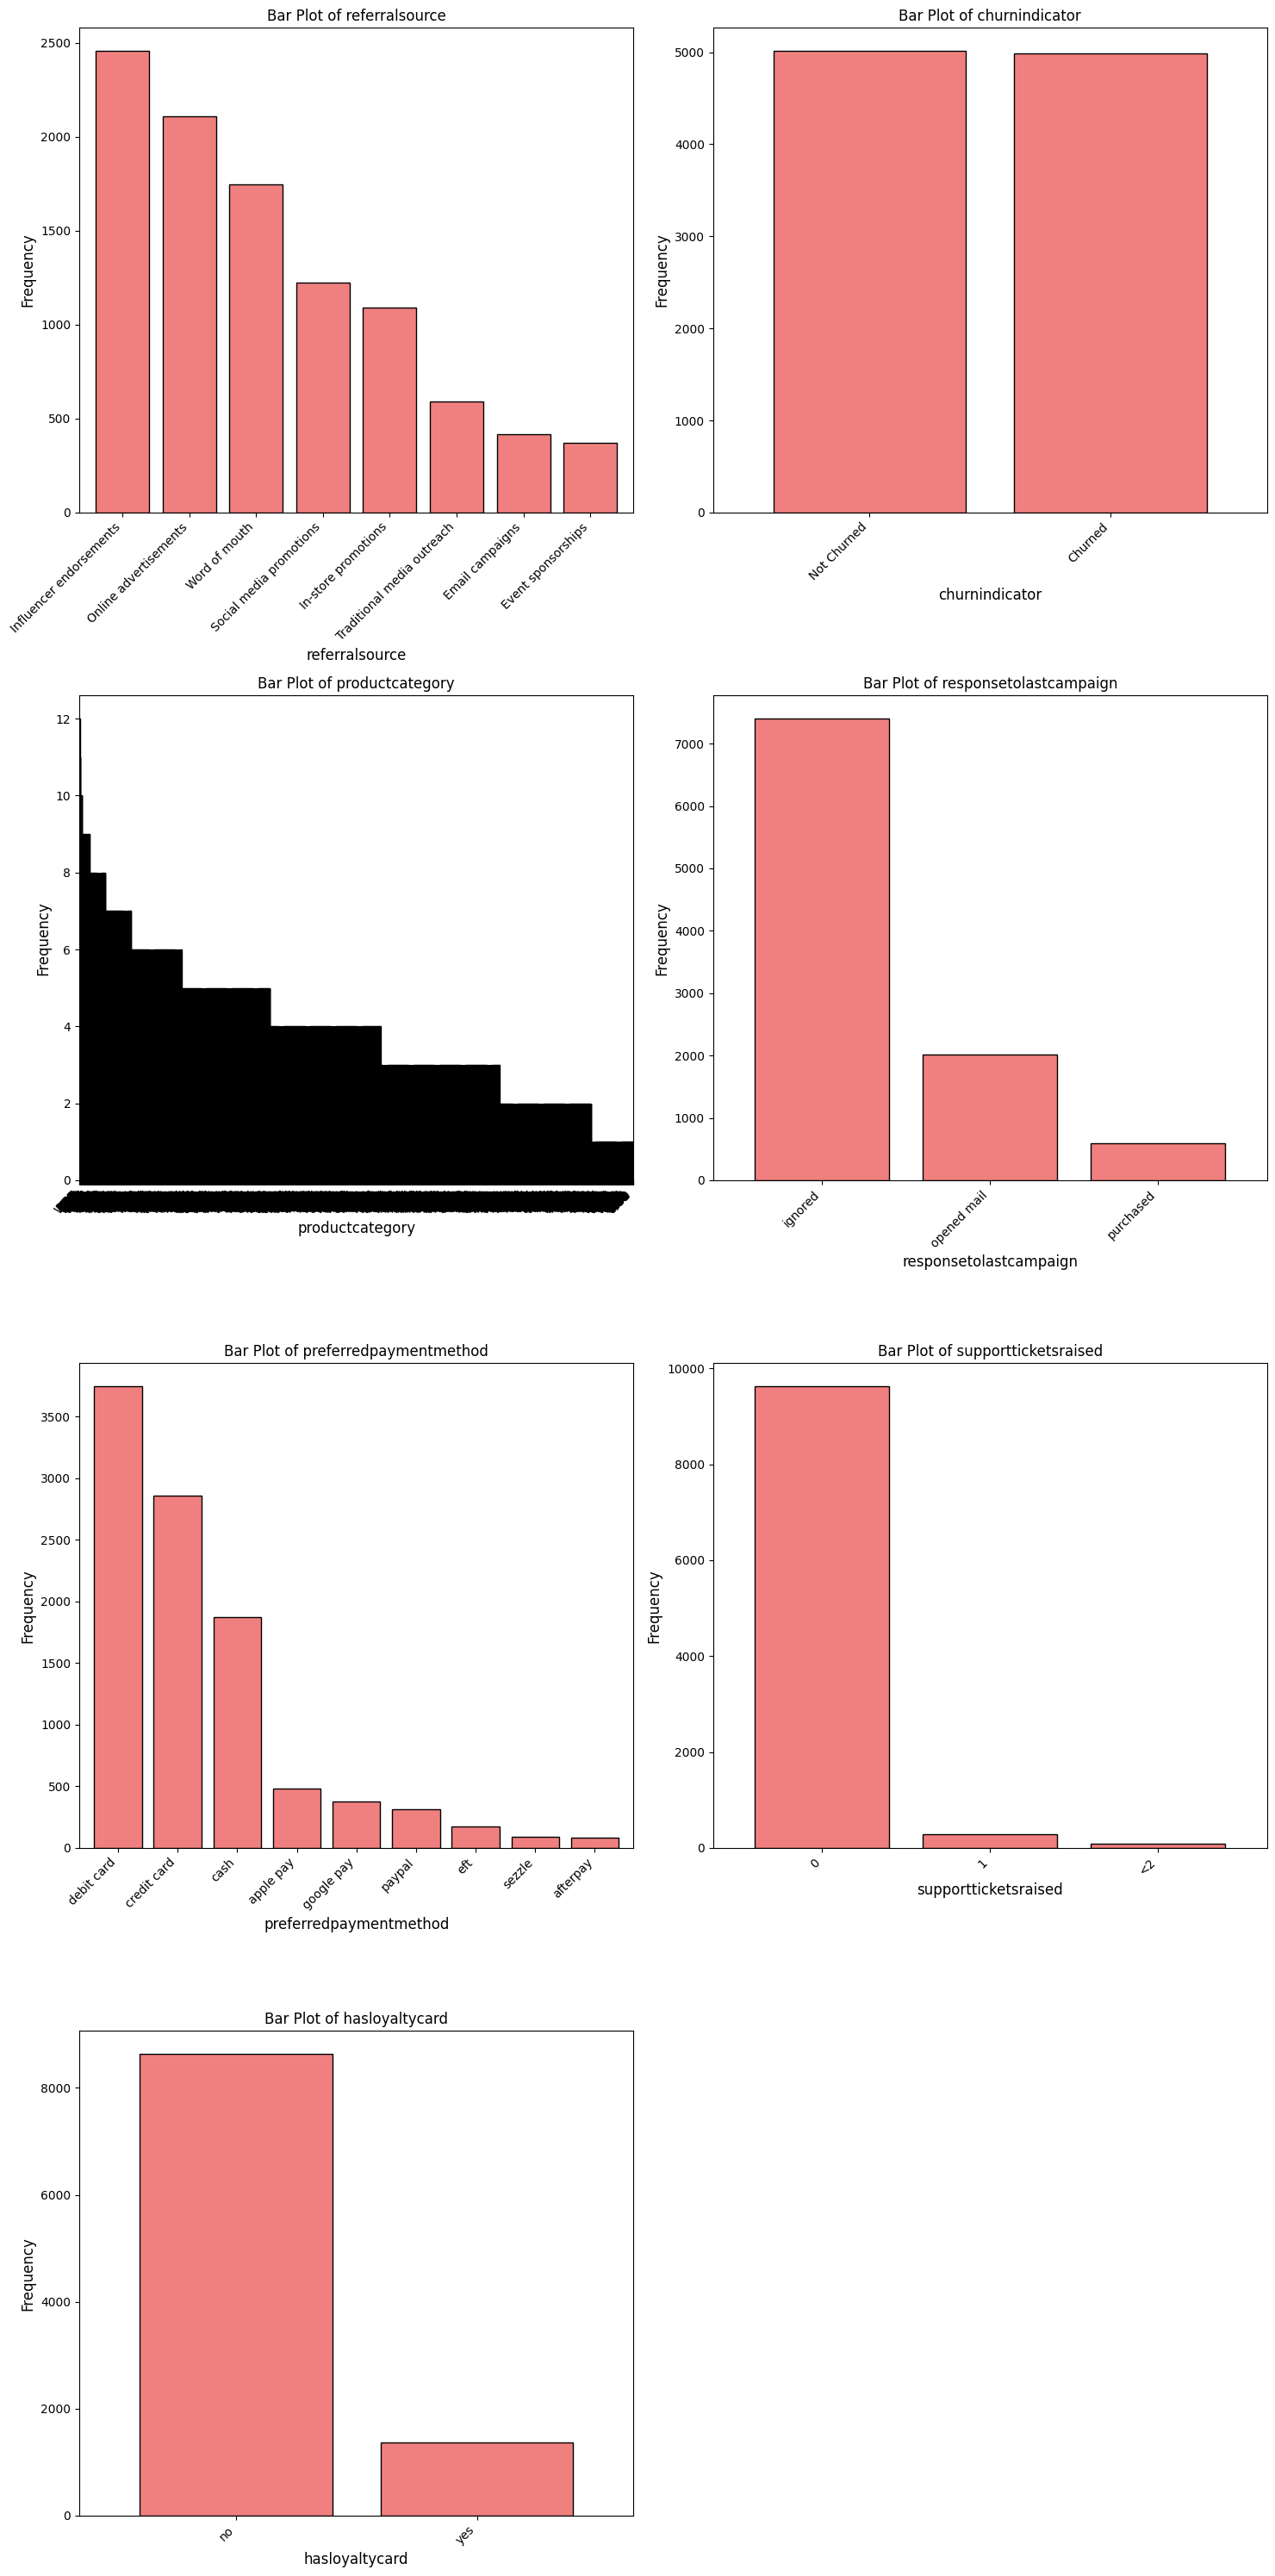

In [ ]:
# Step2: Generating bar plots for categorical columns
plt.figure(figsize=(15, 30))

# Calculate the number of rows and columns for subplots
num_rows = 4  # Adjusted to accommodate 7 categorical columns
num_cols = 2

for i, col in enumerate(categorical_cols, 1):
    # Check if the current subplot index exceeds the total number of subplots
    if i > num_rows * num_cols:
        # Create a new figure if the current figure is full
        plt.figure(figsize=(15, 30))
        i = 1  # Reset subplot index for the new figure

    plt.subplot(num_rows, num_cols, i)

    # Use a brighter color and adjust bar width to make them distinct
    df[col].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black', width=0.8)

    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col, fontsize=12)  # Increase x-axis label font size
    plt.ylabel('Frequency', fontsize=12)  # Increase y-axis label font size

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
df['productcategory'].unique()

array(['Q02', 'F76', 'X04', ..., 'B04', 'M19', 'W69'], dtype=object)

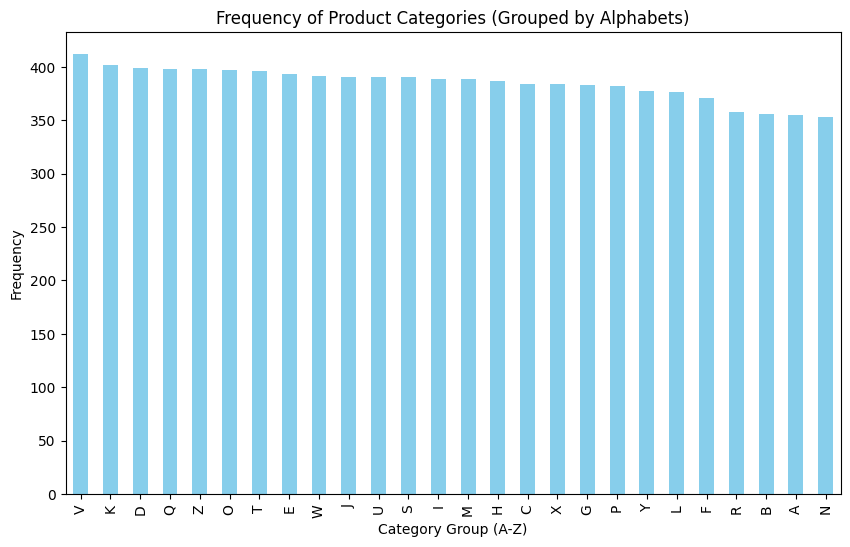

In [ ]:
# Create a new column 'category_group' by taking the alphabets'
df['category_group'] = df['productcategory'].str[0]

# Plot the frequency of each category group
plt.figure(figsize=(10, 6))
df['category_group'].value_counts().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Frequency of Product Categories (Grouped by Alphabets)")
plt.xlabel("Category Group (A-Z)")
plt.ylabel("Frequency")
plt.show()


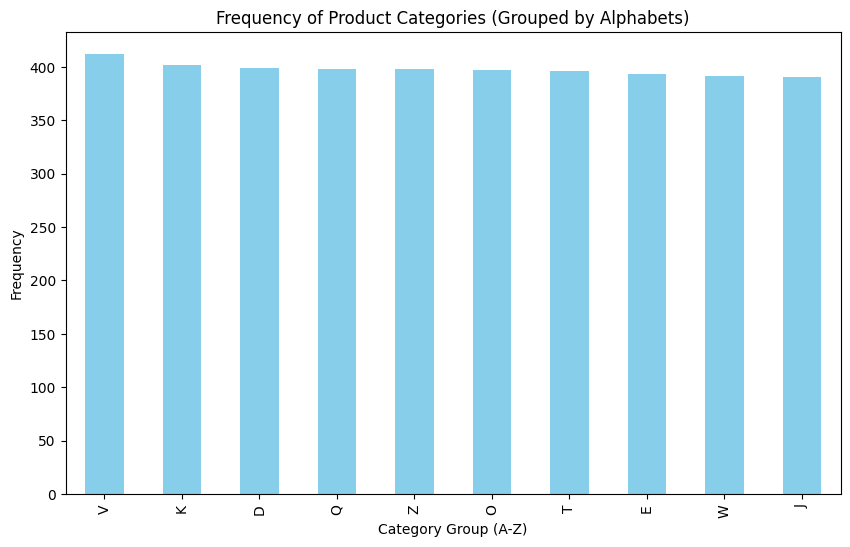

In [ ]:
# Create a new column 'category_group' by taking the alphabets'
df['category_group'] = df['productcategory'].str[0]

# Plot the frequency of each category group
plt.figure(figsize=(10, 6))
df['category_group'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title("Frequency of Product Categories (Grouped by Alphabets)")
plt.xlabel("Category Group (A-Z)")
plt.ylabel("Frequency")
plt.show()


###**Analysis for Numerical Columns** : Based on the histograms shown in the image, here’s an analysis of the distributions for each numerical column:

customerid: Appears to be uniformly distributed, as each value range has roughly equal counts.

totalpurchases: Shows a right-skewed distribution, with most customers making a smaller number of purchases, and only a few with higher purchase counts.

totalrevenue: Looks fairly uniform but with a slight drop at the end. This could suggest a limit to the revenue range.

churnindicator: This is a binary variable (0 or 1), showing a bimodal distribution, with almost equal counts for each value.

discountsused: Also appears nearly uniform, with similar frequencies across different values.

feedbackscore: Highly skewed toward the high end (around 5), indicating that most customers provide high feedback scores.

frequency: Right-skewed, meaning most customers have low-to-moderate purchase frequency, with fewer high-frequency purchasers.

avgpurchasevalue: Extremely right-skewed, where most values are small, but there are some high values indicating a few high-value transactions.

recency: Right-skewed, suggesting that many customers made recent purchases, with fewer customers having long gaps since their last purchase.

tenure: Shows a right-skewed distribution, meaning most customers have been with the company for a shorter time, with fewer having a long tenure.

timebetweenpurchases: Right-skewed, where most intervals between purchases are relatively short.

avgtimebetweendays: Similar to timebetweenpurchases, with a strong right skew, indicating that most customers have shorter intervals on average between purchases, with fewer having longer intervals.

### Analysis for Categorical Columns :

Referrals : Influencer endorsements and online ads are the most effective referral sources.

Customer Engagement:Most customers ignore marketing campaigns.

Payment Methods: Debit cards are the preferred payment method.

Customer Support: Most customers have not raised support tickets, indicating a positive customer experience.

Product Category : As we have lot of unique values for the ProductCategory column, the categories in the bar plot tend to overlap, as a result of this we have categorized all the products based on the alphabets and generated a bar plot for it. Finally, we have selected the top 10 product categories from it. And we found that the bar plot, it appears that product categories starting with the letter "V" have the highest frequency.


### Bivariate Analysis:
    1. Construct a correlation matrix for all the numerical features in the dataset. Which pairs of features are highly correlated? Are there any unexpected correlations?
    2. Use box plots to compare the distribution of a chosen numerical column (e.g., TotalRevenue) across different categories in the dataset. Which category tends to have higher values for the chosen numerical column?


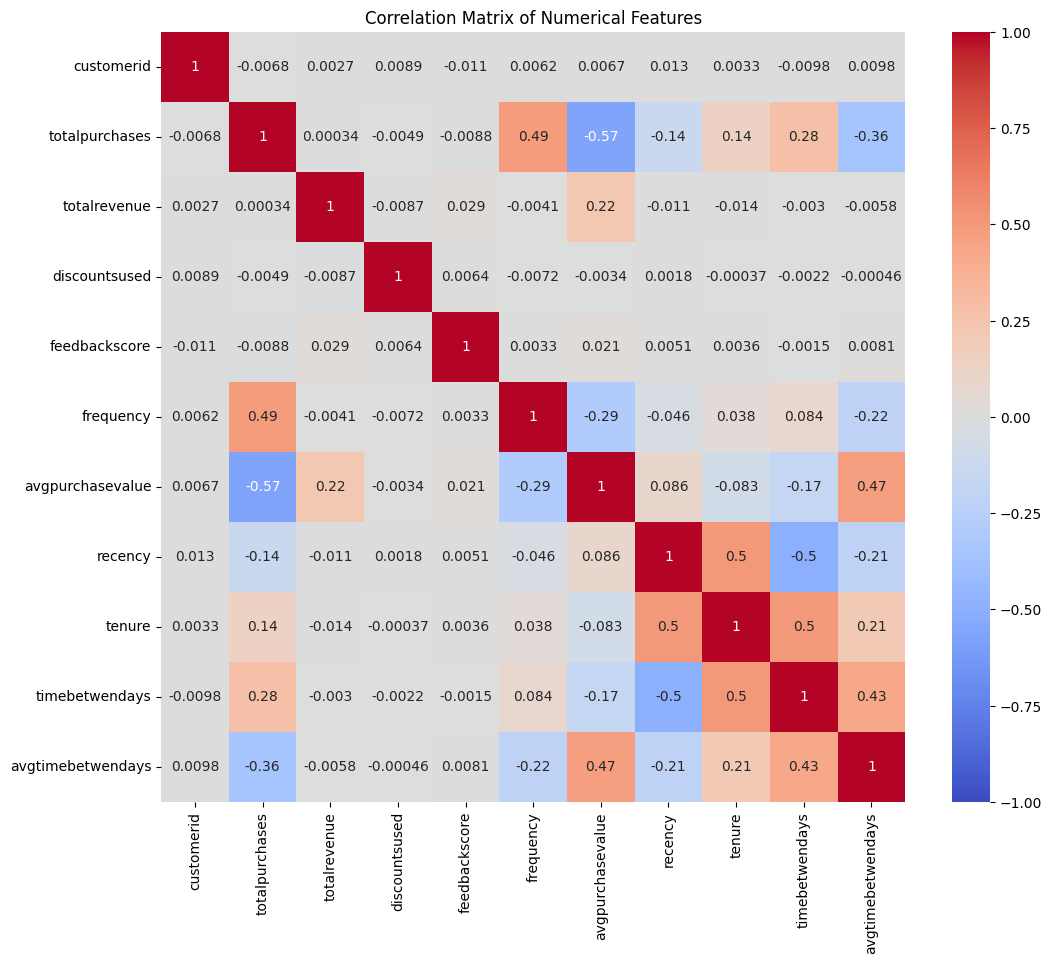

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


Recency and Tenure : A strong positive correlation of 0.5 indicates that customers who have been with the company longer (higher tenure) tend to have more recent purchases. This is likely due to factors like brand loyalty and consistent purchasing behavior.


Tenure and Time Between Days: A positive correlation of 0.5 suggests that customers with longer tenure tend to have longer intervals between purchases. This could be attributed to various factors, such as decreased purchase frequency over time or a shift in purchasing behavior.

Average Purchase Value and Average Time Between Days:  A moderate positive correlation of 0.47 indicates that customers with higher average purchase values tend to have longer intervals between purchases. This could be due to the purchase of high-value items that are not bought frequently.


totalpurchases and avgpurchasevalue: A moderate negative correlation (-0.57) suggests that customers who make more purchases tend to have lower average purchase values. This could be due to various reasons, such as bulk purchases or discounts for frequent customers.


avgpurchasevalue and timebetwendays: A strong negative correlation (-0.75) indicates that customers with higher average purchase values tend to have longer intervals between purchases. This could be due to high-value items purchased less frequently.

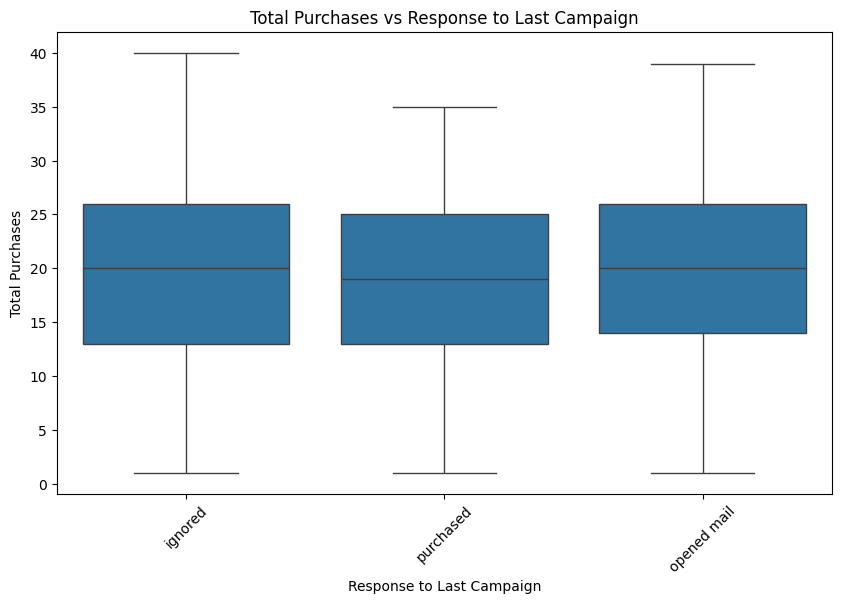

In [ ]:
#Use box plots to compare the distribution of a chosen numerical column (e.g., TotalRevenue) across different categories in the dataset. Which category tends to have higher values for the chosen numerical column?

plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x='responsetolastcampaign', y='totalpurchases', data=df)

# Set plot title and labels
plt.title('Total Purchases vs Response to Last Campaign')
plt.xlabel('Response to Last Campaign')
plt.ylabel('Total Purchases')

# Rotate x labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.show()





the median for the "purchased" group is indeed lower than the other two groups.
This suggests that while some customers who purchased after the campaign made a significant number of purchases, the majority of them made fewer purchases compared to those who opened the mail but didn't necessarily purchase. The median for the "opened mail" and "ignored" groups appears to be very similar, suggesting that the overall purchasing behavior of customers who opened the mail is not significantly different from those who ignored it.

However, it's important to note that the "opened mail" group has a wider range of total purchases, indicating that there might be a subset of customers who made a significant number of purchases after opening the mail.

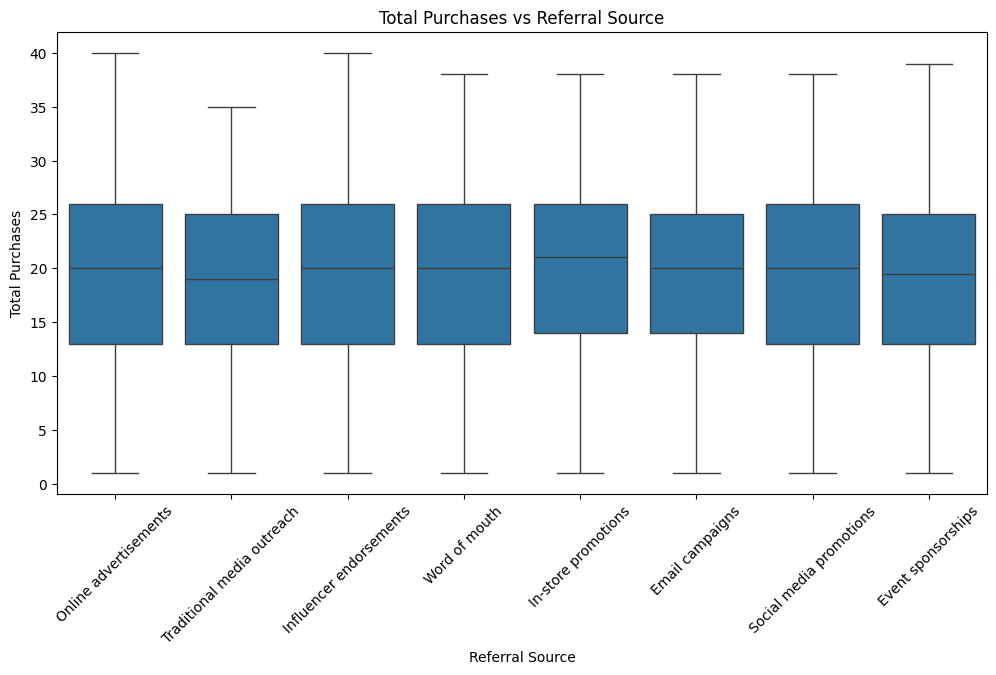

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your DataFrame named `df`
plt.figure(figsize=(12, 6))

# Create the box plot
sns.boxplot(x='referralsource', y='totalpurchases', data=df)

# Set plot title and labels
plt.title('Total Purchases vs Referral Source')
plt.xlabel('Referral Source')
plt.ylabel('Total Purchases')

# Rotate x labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.show()


The box plot reveals that the distribution of total purchases is quite similar across different referral sources. The median is nearly similar for all the referral sources. However there are few exceptions as on, some referral sources like online advertisements and word of mouth have smaller number of customers who tend to make larger number of purchases.

### Lakshmi

### Advanced Analysis:
    1. Use a pair plot to visualize relationships between a select set of columns (totalpurchases, totalrevenue, avgpurchasevalue, frequency). Can you identify any clusters or outliers from the plots?
    2. Analyze the total revenue trend based on the year of the first purchase. In which year did customers contribute the most to total revenue?
    3. Use the RFM (Recency, Frequency, Monetary) model to identify the top 5% of customers. List their customerid and associated RFM_Score.


#### Visualize Relationships with a Pair Plot

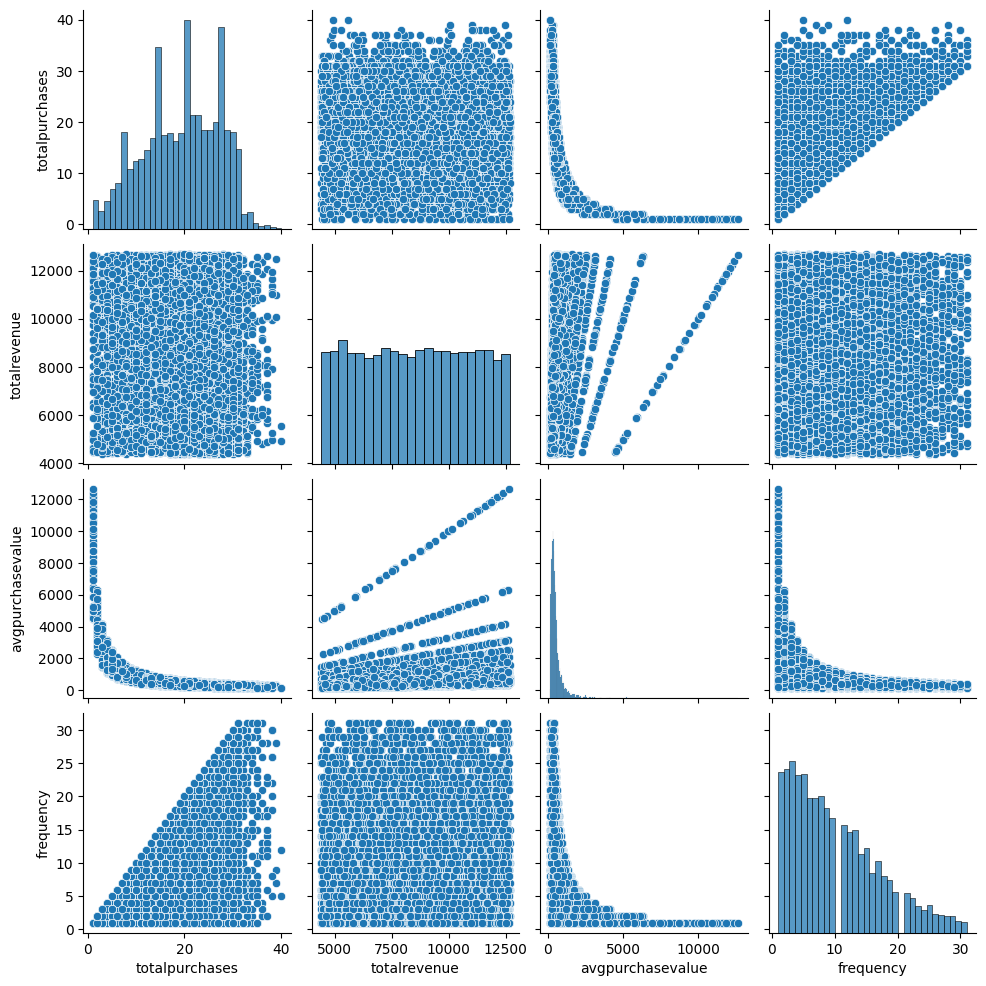

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['totalpurchases', 'totalrevenue', 'avgpurchasevalue', 'frequency']])
plt.show()

**Frequent, Low-Value Transactions:** The majority of consumers engage in regular, low-cost purchases, indicating a shift towards smaller, repeated transactions instead of larger, sporadic ones.

**Revenue Influenced by Purchase Value:** Total revenue is impacted more by the average purchase value rather than the frequency of purchases, suggesting that purchases of higher value greatly enhance revenue.

**Revenue and Purchase Value Outliers:** A small number of high-value outliers are notable, indicating a possible segment of affluent customers that may be pursued for premium promotions or tailored marketing.


#### Analyze the Total Revenue Trend by Year of First Purchase

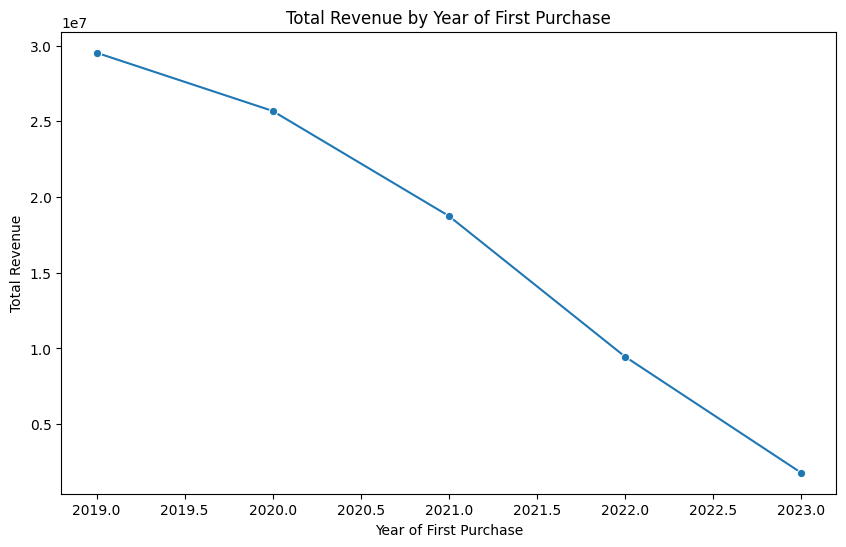

Year with highest total revenue contribution: 2019


In [ ]:
# Ensure you have a 'first_purchase_year' column in the DataFrame
df['first_purchase_year'] = df['firstpurchasedate'].dt.year

# Group by 'first_purchase_year' and sum the total revenue
revenue_by_year = df.groupby('first_purchase_year')['totalrevenue'].sum().reset_index()

# Plotting the total revenue trend by year
plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_by_year, x='first_purchase_year', y='totalrevenue', marker='o')
plt.title('Total Revenue by Year of First Purchase')
plt.xlabel('Year of First Purchase')
plt.ylabel('Total Revenue')
plt.show()

# Identify the year with the maximum revenue contribution
max_revenue_year = revenue_by_year.loc[revenue_by_year['totalrevenue'].idxmax()]
print("Year with highest total revenue contribution:", max_revenue_year['first_purchase_year'])


#### Identify Top 5% of Customers Using RFM Model

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'last_purchase_date' and 'totalrevenue' are available
current_date = pd.to_datetime('today')

# Calculate Recency, Frequency, Monetary values
df['Recency'] = (current_date - df['lastpurchasedate']).dt.days
df['Frequency'] = df['totalpurchases']
df['Monetary'] = df['totalrevenue']

# Rank each customer on Recency, Frequency, Monetary (1-5 scale)
df['R_rank'] = pd.qcut(df['Recency'], 5, labels=range(5, 0, -1)).astype(int)
df['F_rank'] = pd.qcut(df['Frequency'], 5, labels=range(1, 6)).astype(int)
df['M_rank'] = pd.qcut(df['Monetary'], 5, labels=range(1, 6)).astype(int)

# Calculate the RFM Score
df['RFM_Score'] = df['R_rank'] + df['F_rank'] + df['M_rank']

# Identify top 5% of customers by RFM score
top_customers = df.nlargest(int(0.05 * len(df)), 'RFM_Score')[['customerid', 'RFM_Score']]

# Display the top 5% customers
print("Top 5% Customers:")
print(top_customers)

Top 5% Customers:
      customerid  RFM_Score
194        29316         15
315        32001         15
474        35486         15
547        46789         15
561        42949         15
...          ...        ...
2555        9337         13
2596       47104         13
2605       14478         13
2608       40867         13
2613       15229         13

[500 rows x 2 columns]


### Multivariate Analysis:
    1. Create a scatter plot of totalrevenue vs. frequency and color the data points based on the churnindicator. What patterns do you observe concerning customer churn?
    2. Use the parallel coordinates plot to visualize multi-dimensional relationships using the columns totalpurchases, totalrevenue, avgpurchasevalue, frequency, and hasloyaltycard. Do any patterns emerge based on loyalty card holders?

In [ ]:
# Check unique values in churnindicator column
print(df['churnindicator'].unique())

['Not Churned' 'Churned']


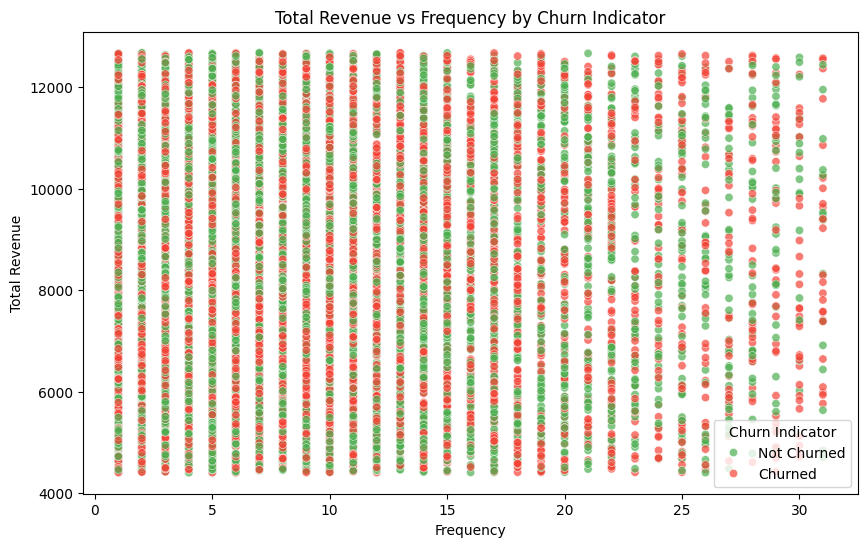

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='frequency', y='totalrevenue', hue='churnindicator',
                palette={'Not Churned': "#4CAF50", 'Churned': "#F44336"}, alpha=0.7)
plt.title('Total Revenue vs Frequency by Churn Indicator')
plt.xlabel('Frequency')
plt.ylabel('Total Revenue')
plt.legend(title='Churn Indicator')
plt.show()


1. **Churn-Frequency Connection**: Customers who churn usually show lower engagement frequencies, suggesting that reduced interaction could be associated with an increased chance of churn.

2. **Strong Engagement, Low Attrition**: Customers who remain show greater concentrations in regions with high activity and overall revenue, indicating that robust engagement supports retention.

3. **Frequency as an Indicator**: Frequency seems to be a more crucial indicator of churn than total revenue, since churned and non-churned customers exhibit a comparable distribution in revenue.

# <center> CLV Modelling

### Ridge Regression:
1. Load the dataset and split it into training and testing sets, keeping 20% of the data for testing.
2. Implement a Ridge Regression model using the provided features (`Recency`, `Frequency`, `AvgPurchaseValue`) to predict the `TotalRevenue`.
3. Set the alpha parameter for Ridge Regression to 1.0. How does this value affect the coefficients of the model?
4. Evaluate the model using Mean Squared Error (MSE) on the test set. Report the obtained value.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define the features (X) and target variable (y)
X = df[['recency', 'frequency', 'avgpurchasevalue']]
y = df['totalrevenue']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge regression model with alpha=1.0
ridge_model = Ridge(alpha=1.0)

# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = ridge_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Output the coefficients and MSE
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error (MSE): {mse}')


Coefficients: [-0.1935113  22.42931012  0.70074323]
Intercept: 7951.871045094726
Mean Squared Error (MSE): 5519717.030198818


**The frequency of purchases and AveragePurchaseValue are crucial factors influencing revenue:** Customers who buy often and possess higher average purchase values greatly impact TotalRevenue.

**Recency adversely affects revenue:** The closer a customer's purchase to the present, the lesser their anticipated revenue, highlighting the need for re-engagement tactics.

**Model performance requires enhancement:** The elevated MSE (5,519,717) indicates that the model might not be identifying all pertinent patterns, and additional refinement or extra features could be required.


### Random Forest Regressor:
5. Implement a Random Forest Regressor with 100 trees to predict the CLV.
6. Using the feature importance attribute of the Random Forest model, list the features in order of their importance.
7. Evaluate the model's performance using the test set. How does it compare to the Ridge Regression model?

In [ ]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize Random Forest Regressor with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Output the MSE for Random Forest
print(f'Mean Squared Error (Random Forest): {mse_rf}')

# Feature Importance from the Random Forest Model
feature_importances = rf_model.feature_importances_

# List features and their importance in descending order
features = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance_df)

Mean Squared Error (Random Forest): 3569728.32444965
Feature Importance (Random Forest):
            Feature  Importance
2  avgpurchasevalue    0.617861
0           recency    0.234328
1         frequency    0.147811


**AvgPurchaseValue is the key feature:** It holds the highest significance (0.6179), indicating it greatly impacts CLV predictions, with Recency and Frequency following.

**Recency serves as an important predictor:** With a value of 0.2343, Recency is vital in calculating CLV, indicating that the timing of a customer's most recent purchase greatly influences their lifetime value.

**Model Performance:** The Random Forest model demonstrates a reduced Mean Squared Error (3,569,728) in comparison to Ridge Regression, suggesting it excels at identifying intricate relationships within the data and delivers more precise CLV predictions.


### XGBoost:
11. Implement the XGBoost regressor to predict the CLV. Use 100 estimators for the model.
12. XGBoost offers various hyperparameters to tune. Alter the learning rate of the model. How does it impact the model's performance?
13. Evaluate the model using the test data and compare its MSE with previous models.

In [ ]:
# Importing necessary libraries
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Initialize XGBoost Regressor with 100 estimators
xgb_model = xgb.XGBRegressor(n_estimators=100)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Output the MSE for XGBoost
print(f'Mean Squared Error (XGBoost): {mse_xgb}')



Mean Squared Error (XGBoost): 3592739.874573346


In [ ]:
# Importing necessary libraries
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Initialize XGBoost Regressor with 100 estimators and learning rate
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.5, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Output the MSE for XGBoost
print(f'Mean Squared Error (XGBoost): {mse_xgb}')


Mean Squared Error (XGBoost): 3971304.5699676666


### Advanced Regression Model

14. Train other regression models like Ridge, Lasso, Decision Trees, Random Forest, and Gradient Boosting to predict totalrevenue.
15. Use cross-validation for model selection and tuning.
16. Evaluate the models using the same metrics as before and compare their performances.

In [ ]:
# Import necessary libraries
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Cross-validation and model evaluation
results = {}

for model_name, model in models.items():
    # Cross-validation for model selection
    cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    mean_cv_score = -cv_scores.mean()  # Convert negative MSE to positive

    # Train the model on the full training set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate the Mean Squared Error for the test set
    mse = mean_squared_error(y_test, y_pred)

    # Store the results
    results[model_name] = {
        'Mean CV Score': mean_cv_score,
        'Test MSE': mse
    }

# Display the results
for model_name, result in results.items():
    print(f"{model_name} - Mean CV Score: {result['Mean CV Score']}, Test MSE: {result['Test MSE']}")

Ridge - Mean CV Score: 5366455.8023237595, Test MSE: 5519717.030198818
Lasso - Mean CV Score: 5366455.750842559, Test MSE: 5519716.850186768
Decision Tree - Mean CV Score: 6303759.196125, Test MSE: 6514225.733
Random Forest - Mean CV Score: 3518050.8030521497, Test MSE: 3569728.32444965
Gradient Boosting - Mean CV Score: 3169263.2932364116, Test MSE: 3217362.593228422


**Gradient Boosting** is the best model based on the lowest MSE, closely followed by **Random Forest**. Both models outperform the linear models (**Ridge and Lasso**) and the **Decision Tree** in predicting **TotalRevenue**.

## Karthik

### Hyperparameter Tuning:

17. For models that have hyperparameters, use techniques like GridSearchCV or RandomizedSearchCV to find optimal values.
18. Re-evaluate the models using the optimized hyperparameters.

In [ ]:
# #checking

# import numpy as np
# import pandas as pd
# from sklearn.model_selection import RandomizedSearchCV, train_test_split
# from sklearn.linear_model import Ridge, Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.preprocessing import StandardScaler

# # Assuming df is your DataFrame
# # Data preparation
# # Convert categorical values if necessary
# df['churnindicator'] = df['churnindicator'].map({'Not Churned': 0, 'Churned': 1})

# # Check for missing values and handle them (if any)
# df = df.replace([np.inf, -np.inf], np.nan).dropna()  # Handle infinities and NaNs

# # Define features and target
# X = df[['totalpurchases', 'churnindicator', 'discountsused', 'feedbackscore', 'frequency',
#         'avgpurchasevalue', 'recency', 'tenure', 'RFM_Score']]
# y = df["totalrevenue"]

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Use a smaller subset of training data for initial tuning
# X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# # Define hyperparameter grids
# ridge_params = {
#     'alpha': [0.001, 0.01, 0.1, 1, 10],
#     'max_iter': [500, 1000]
# }

# lasso_params = {
#     'alpha': [0.001, 0.01, 0.1, 1, 10],
#     'max_iter': [500, 1000]
# }

# decision_tree_params = {
#     'criterion': ['squared_error', 'absolute_error'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# # Expanded hyperparameter grid for Random Forest
# random_forest_params = {
#     'n_estimators': [10, 50, 100, 200],  # Expanded number of trees
#     'criterion': ['squared_error', 'absolute_error'],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5]
# }

# # Expanded hyperparameter grid for Gradient Boosting
# gradient_boosting_params = {
#     'n_estimators': [50, 100, 200],  # Expanded number of trees
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.7, 1],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5]
# }

# # Combine models and parameters
# models_params = [
#     (Ridge(), ridge_params),
#     (Lasso(), lasso_params),
#     (DecisionTreeRegressor(random_state=42), decision_tree_params),
#     (RandomForestRegressor(random_state=42, verbose=0), random_forest_params),
#     (GradientBoostingRegressor(random_state=42, verbose=0), gradient_boosting_params)
# ]

# # Hyperparameter tuning with adjusted n_iter and cv=5 for more reliable results
# for model, params in models_params:
#     # Dynamically adjust n_iter based on the number of parameter combinations
#     param_combinations = np.prod([len(v) for v in params.values()])
#     n_iter = min(20, param_combinations)  # Set n_iter based on the size of the parameter grid

#     random_search = RandomizedSearchCV(
#         estimator=model,
#         param_distributions=params,
#         n_iter=n_iter,
#         scoring='neg_mean_squared_error',
#         cv=5,  # Increased cv to 5 for more robust evaluation
#         verbose=1,
#         n_jobs=-1,
#         random_state=42
#     )

#     random_search_result = random_search.fit(X_train_sample, y_train_sample)

#     # Print the best parameters and scores
#     print(f"Best Parameters for {type(model).__name__}: {random_search_result.best_params_}")
#     print(f"Best Cross-Validation Score for {type(model).__name__}: {-random_search_result.best_score_}\n")

# # Optionally: You can evaluate the best model on the full test set
# best_model = random_search.best_estimator_
# test_score = best_model.score(X_test, y_test)
# print(f"Test Set R^2 Score for the Best Model: {test_score}")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
# Data preparation
# Convert categorical values if necessary
df['churnindicator'] = df['churnindicator'].map({'Not Churned': 0, 'Churned': 1})

# Define features and target
X = df[['totalpurchases', 'churnindicator', 'discountsused', 'feedbackscore', 'frequency',
        'avgpurchasevalue', 'recency', 'tenure', 'RFM_Score']]
y = df["totalrevenue"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Use a smaller subset of training data for initial tuning
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Define hyperparameter grids
ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [500, 1000]
}

lasso_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [500, 1000]
}

decision_tree_params = {
    'criterion': ['squared_error', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set fewer estimators and simpler grid for initial tuning
random_forest_params = {
    'n_estimators': [10, 50],  # Reduced for faster tuning
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gradient_boosting_params = {
    'n_estimators': [10, 50],  # Reduced for faster tuning
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.7, 1],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Combine models and parameters
models_params = [
    (Ridge(), ridge_params),
    (Lasso(), lasso_params),
    (DecisionTreeRegressor(random_state=42), decision_tree_params),
    (RandomForestRegressor(random_state=42, verbose=0), random_forest_params),
    (GradientBoostingRegressor(random_state=42, verbose=0), gradient_boosting_params)
]

# Hyperparameter tuning with reduced n_iter and cv=2
for model, params in models_params:
    n_iter = 10 if isinstance(model, (RandomForestRegressor, GradientBoostingRegressor)) else 20
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=n_iter,
        scoring='neg_mean_squared_error',
        cv=2,  # Reduced to 2 for quicker tuning
        verbose=1,
        n_jobs=-1,
        random_state=42
    )
    random_search_result = random_search.fit(X_train_sample, y_train_sample)

    # Print the best parameters and scores
    print(f"Best Parameters for {type(model).__name__}: {random_search_result.best_params_}")
    print(f"Best Cross-Validation Score for {type(model).__name__}: {-random_search_result.best_score_}\n")


Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for Ridge: {'max_iter': 500, 'alpha': 0.001}
Best Cross-Validation Score for Ridge: 965552.0063277257

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters for Lasso: {'max_iter': 500, 'alpha': 0.001}
Best Cross-Validation Score for Lasso: 965551.995113296

Fitting 2 folds for each of 20 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for DecisionTreeRegressor: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'squared_error'}
Best Cross-Validation Score for DecisionTreeRegressor: 281125.3295069444

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters for RandomForestRegressor: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'absolute_error'}
Best Cross-Validation Score for RandomForestRegressor: 143586.1293577

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters for GradientBoostingRegressor: {'subsample': 0.7, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}
Best Cross-Validation Score for GradientBoostingRegressor: 113081.71279676315



### Feature Importance:

19. For tree-based models like Random Forest and Gradient Boosting, extract feature importance scores.
20. Analyze and interpret the top features affecting totalrevenue.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Assuming df is your DataFrame
# Data preparation
df['churnindicator'] = df['churnindicator'].map({'Not Churned': 0, 'Churned': 1})

# Define features and target
X = df[['totalpurchases', 'churnindicator', 'discountsused', 'feedbackscore', 'frequency',
        'avgpurchasevalue', 'recency', 'tenure', 'RFM_Score']]
y = df["totalrevenue"]

# Handle missing values
# If churnindicator is entirely NaN, we can drop it or impute it with a constant (e.g., 0)
# Here, we'll drop it since it has no valid values
X = X.drop(columns=['churnindicator'])

# Impute missing values for the rest of the features using SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Use a smaller subset of training data for initial tuning
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Set hyperparameter grid for RandomForest and GradientBoosting
random_forest_params = {
    'n_estimators': [10, 50],
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gradient_boosting_params = {
    'n_estimators': [10, 50],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.7, 1],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Train Random Forest and Gradient Boosting models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning using RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=random_forest_params,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=2,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search_rf.fit(X_train_sample, y_train_sample)

# Best model after Randomized Search for RandomForest
best_rf_model = random_search_rf.best_estimator_

# Hyperparameter tuning using RandomizedSearchCV for Gradient Boosting
random_search_gb = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gradient_boosting_params,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=2,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search_gb.fit(X_train_sample, y_train_sample)

# Best model after Randomized Search for Gradient Boosting
best_gb_model = random_search_gb.best_estimator_

# Extract feature importance for Random Forest
rf_feature_importance = best_rf_model.feature_importances_

# Extract feature importance for Gradient Boosting
gb_feature_importance = best_gb_model.feature_importances_

# Combine feature names with their importance scores
feature_names = X.columns
rf_importance_df = pd.DataFrame({'Feature': feature_names, 'Random Forest Importance': rf_feature_importance})
gb_importance_df = pd.DataFrame({'Feature': feature_names, 'Gradient Boosting Importance': gb_feature_importance})

# Sort the importance values
rf_importance_df = rf_importance_df.sort_values(by='Random Forest Importance', ascending=False)
gb_importance_df = gb_importance_df.sort_values(by='Gradient Boosting Importance', ascending=False)

# Print the top features
print("Top Features by Random Forest Importance:")
print(rf_importance_df.head())

print("\nTop Features by Gradient Boosting Importance:")
print(gb_importance_df.head())


Missing values in the dataset:
 totalpurchases          0
churnindicator      10000
discountsused           0
feedbackscore           0
frequency               0
avgpurchasevalue        0
recency                 0
tenure                  0
RFM_Score               0
dtype: int64
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Top Features by Random Forest Importance:
            Feature  Random Forest Importance
4  avgpurchasevalue                  0.473392
7         RFM_Score                  0.318869
5           recency                  0.102756
0    totalpurchases                  0.100085
6            tenure                  0.001890

Top Features by Gradient Boosting Importance:
            Feature  Gradient Boosting Importance
4  avgpurchasevalue                      0.459586
7         RFM_Score                      0.340246
0    totalpurchases                      0.103011
5           recency               

The top features affecting totalrevenue, based on the feature importance scores from both Random Forest and Gradient Boosting, are:

* avgpurchasevalue: The most important feature in both models, significantly impacting totalrevenue.
* RFM_Score: Highly influential, particularly in Random Forest.
* totalpurchases: A notable factor in both models.
* recency: Plays a role, especially in Gradient Boosting.
* tenure: Has the least importance across both models, particularly in Gradient Boosting where it is nearly negligible.